# **UJIAN AKHIR SEMESTER BIIGDATA DAN DATA MINING**

**Nama : Desi Adveni**

**NIM : 23.11.5836**

**Kelas : 23 S1IF 08**

# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **LOAD & PROFILE DATASET**

In [ ]:
# Load dataset
data_path = "/content/drive/MyDrive/SEMESTER 5/BIG DATA MINING/P UAS /diabetes.csv"
data = pd.read_csv(data_path)

In [ ]:
# Basic structure of the dataset
print("Dataset Info:\n")
data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("\nSummary Statistics:\n")
print(data.describe())


Summary Statistics:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

# **DATA PREPROCESSING**

In [ ]:
# Replace zeroes with NaN for columns where zero is not valid
columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zero_as_missing:
    data[col] = data[col].replace(0, np.nan)

# Fill missing values with median
for col in columns_with_zero_as_missing:
    data[col].fillna(data[col].median(), inplace=True)

# Verify no missing values remain
print("\nAfter Preprocessing:\n")
print(data.isnull().sum())


After Preprocessing:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-535305734.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Checking for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Define X and y before EDA
X = data.drop('Outcome', axis=1)
y = data['Outcome']

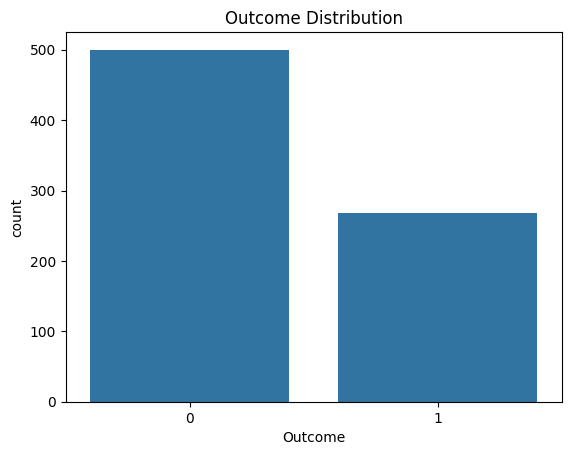

In [ ]:
# Distribution of target variable
sns.countplot(x='Outcome', data=data)
plt.title('Outcome Distribution')
plt.show()

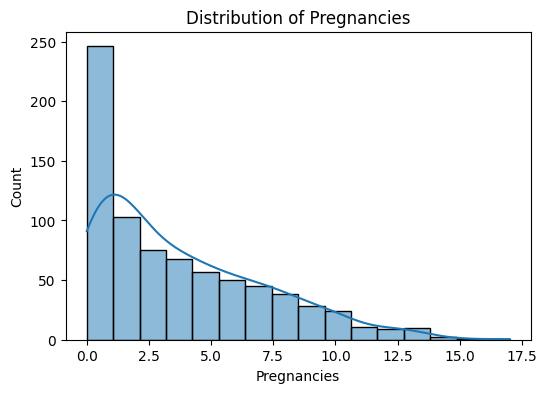

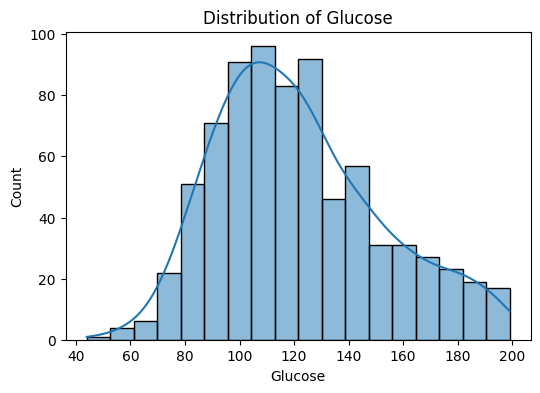

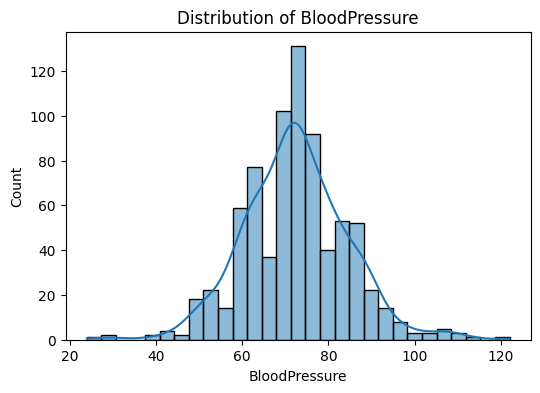

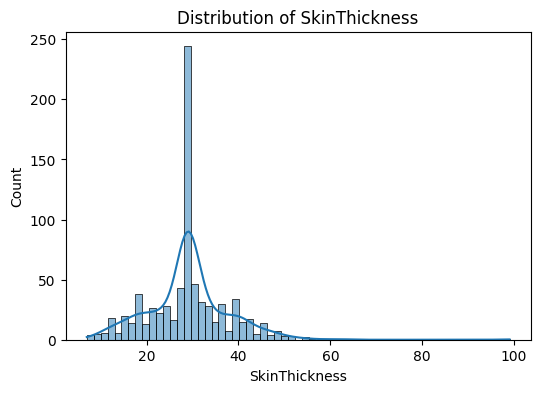

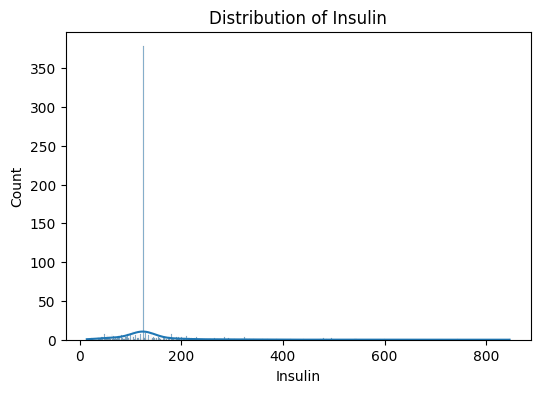

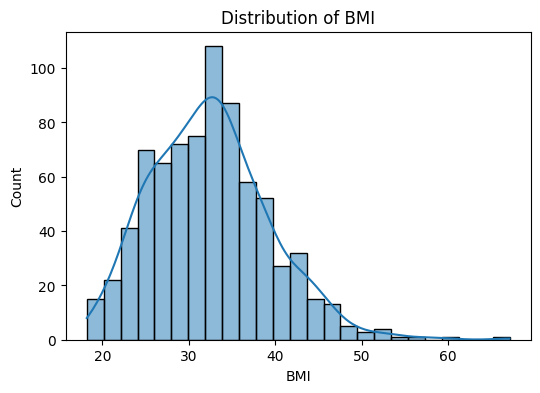

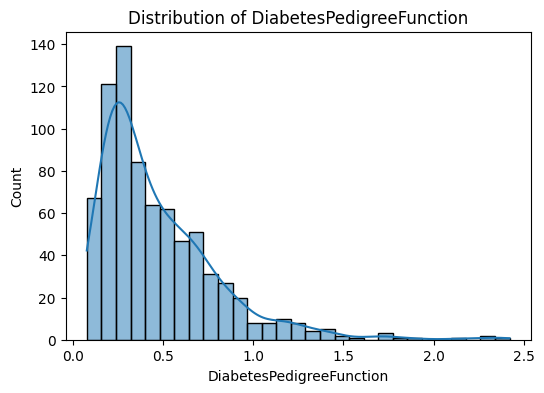

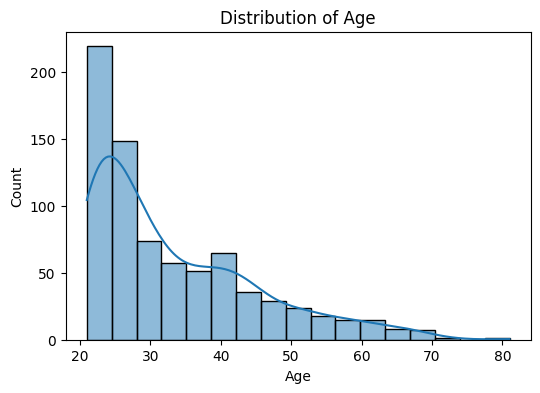

In [ ]:
# Feature Distributions
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

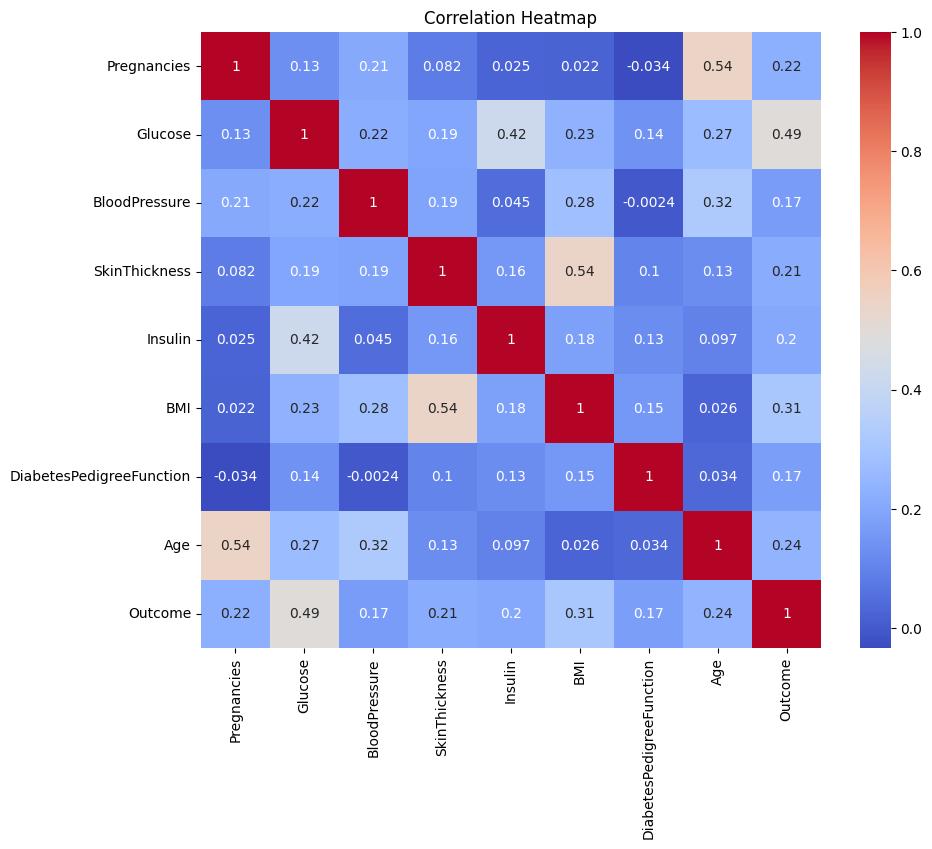

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **SELEKSI FITUR**

In [ ]:
# Using SelectKBest with ANOVA F-test
X = data.drop('Outcome', axis=1)
y = data['Outcome']

selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Scores of features
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

                    Feature       Score
1                   Glucose  245.667855
5                       BMI   82.629271
7                       Age   46.140611
0               Pregnancies   39.670227
3             SkinThickness   37.078538
4                   Insulin   33.190796
6  DiabetesPedigreeFunction   23.871300
2             BloodPressure   21.631580


In [ ]:
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
selected_features

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')

# **Model Training**

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model predictions and probabilities
predictions = model.predict(X_test)
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})
predictions_df.to_csv("diabetes_model_predictions.csv", index=False)

# **MODEL EVALUATION**

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



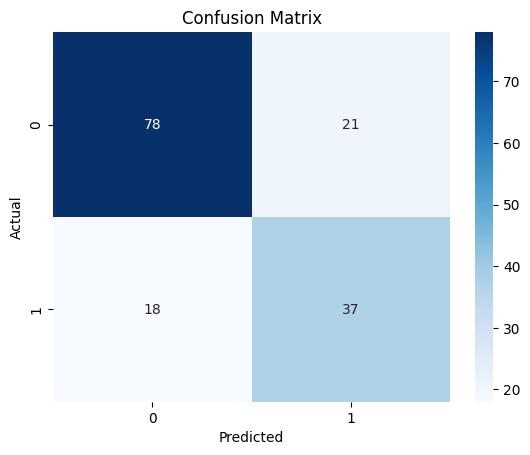

In [ ]:
# Visualization of confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LINK MODEL : /content/diabetes_model_predictions.csv